<a href="https://colab.research.google.com/github/faganvaliyev/ML/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # shift a bit

In [ ]:
X.shape

(60, 3)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
X2D.shape

(60, 2)

In [ ]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

#Explained Variance Ratio

In [ ]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [ ]:
 1 - pca.explained_variance_ratio_.sum()

0.09028309326742034

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame=False,parser='auto')
X_train,y_train = mnist.data[:60_000],mnist.target[:60_000]
X_test,y_test = mnist.data[60_000:],mnist.target[60_000:]

pca=PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1

In [ ]:
pca.explained_variance_ratio_[:10]

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001])

In [ ]:
cumsum[:10]

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ])

In [ ]:
d # onemli olan piksel sayi 784-den(burda dimension=pixel)

154

In [ ]:
784 - d

630

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_test)

In [ ]:
pca.n_components_

149

In [ ]:
pca.explained_variance_ratio_.sum()

0.9503231308905666

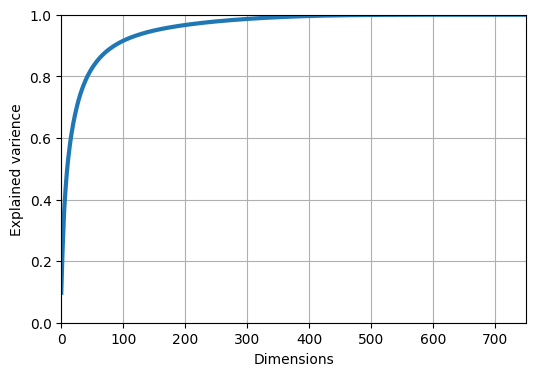

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum,linewidth=3)
plt.axis([0,750,0,1])
plt.xlabel("Dimensions")
plt.ylabel("Explained varience")
plt.grid(True)
plt.show()

#Random and grid SearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))
param_grid={
    "pca__n_components":np.arange(10,80),
    "randomforestclassifier__n_estimators":np.arange(50,100)
}
rnd_search  = RandomizedSearchCV(clf,param_grid,n_iter=10,cv=3,random_state=42)
rnd_search.fit(X_train[:1000],y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79]),
                                        'randomforestclassifier__n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   random_state=42)

In [ ]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 94, 'pca__n_components': 35}

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state=42),SGDClassifier())
param_grid={"pca__n_components":np.arange(10,80)}
grid_search = GridSearchCV(clf,param_grid,cv=3)
grid_search.fit(X_train[:1000],y_train[:1000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [ ]:
grid_search.best_params_

{'pca__n_components': 60}

In [ ]:

grid_search.best_estimator_.fit(X_train,y_train)
grid_search.best_estimator_.score(X_test,y_test)

0.884

In [ ]:
rnd_search.best_estimator_.fit(X_train,y_train)
rnd_search.best_estimator_.score(X_test,y_test)

0.9546

In [ ]:
pca = PCA(0.95)

X_reduced = pca.fit_transform(X_train,y_train)

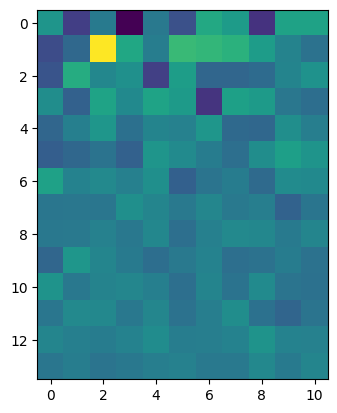

In [ ]:
plt.imshow(X_reduced[0].reshape(14,11))

In [ ]:
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
X_recovered.shape

(60000, 784)

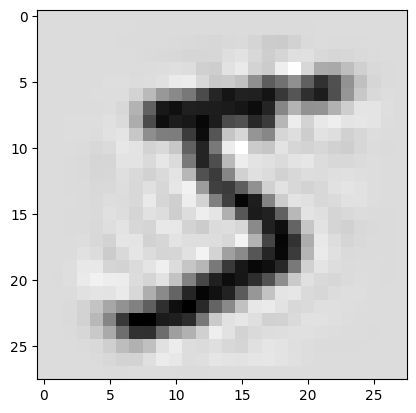

In [ ]:
plt.imshow(X_recovered[0].reshape(28,28),cmap = 'binary')

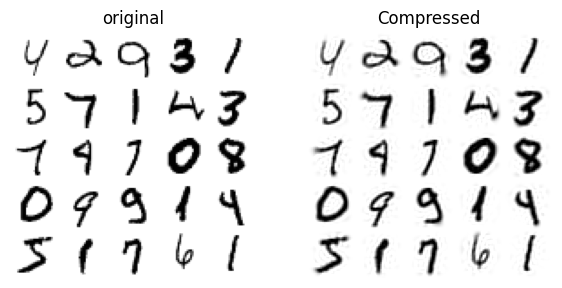

In [ ]:
plt.figure(figsize=(7,4))
for idx , X in enumerate((X_train[::2100],X_recovered[::2100])):
  plt.subplot(1,2,idx+1)
  plt.title(["original","Compressed"][idx])
  for row in range(5):
   for col in range(5):
    plt.imshow(X[row * 5 + col].reshape(28,28),cmap="binary",
               vmin = 0,vmax = 255,extent=(row,row + 1,col,col + 1))
    plt.axis([0,5,0,5])
    plt.axis("off")

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

#LLE

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss,t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10,random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

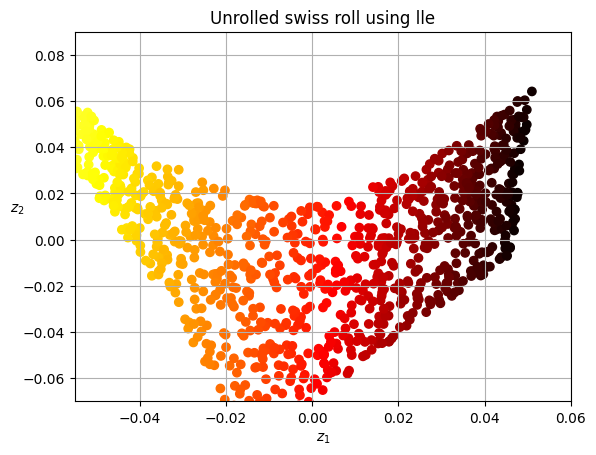

In [ ]:
from matplotlib.colors import ListedColormap
darker_hot = ListedColormap(plt.cm.hot(np.linspace(0,0.8,256)))
plt.scatter(X_unrolled[:,0],X_unrolled[:,1],
            c=t,cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$",rotation=0)
plt.axis([-0.055,0.060,-0.070,0.090])
plt.grid(True)

plt.title("Unrolled swiss roll using lle")
plt.show()